In [1]:
import pandas as pd
import joblib
from data_processing.main import read_scoreset
from tqdm import tqdm
from pathlib import Path
from data_processing.mapping_nbs import mapping_utils
from data_processing.mapping_nbs import plotting
pd.set_option('display.max_columns', 500)

dataset_name = "Findlay_BRCA1_SGE"
dataset_path = Path("/data/dzeiberg/mave_calibration/data/") / dataset_name
assert dataset_path.exists()

In [2]:
metadata, gene_info, gnomAD_df, spliceAI_df, clinvar_df = mapping_utils.load_mapping_data()

In [3]:
scoreset = read_scoreset(dataset_path / "scoreset.csv")

In [4]:
scoreset.head()

,accession,hgvs_nt,hgvs_splice,hgvs_pro,score,score_rep1,score_rep2,score_rna,score_rna_rep1,score_rna_rep2,mavedb_clnsig,mavedb_clnrevstat,author_transcript,RefSeq_pro_dataset,synonymous,nonsense
0,urn:mavedb:00000097-0-1#1,g.78414A>T,NM_007294.3:c.5565A>T,p.Ile1855=,-0.015322,-0.116153,0.085509,-0.403450,-0.160708,-0.482648,NaN,NaN,NM_007294,NP_009225.1,True,False
1,urn:mavedb:00000097-0-1#2,g.78414A>G,NM_007294.3:c.5565A>G,p.Ile1855Met,0.021941,0.174501,-0.130620,-0.289526,0.404663,-1.054867,NaN,NaN,NM_007294,NP_009225.1,False,False
2,urn:mavedb:00000097-0-1#3,g.78414A>C,NM_007294.3:c.5565A>C,p.Ile1855=,0.231183,0.151333,0.311032,0.207660,0.410202,0.168734,Likely_benign,reviewed_by_expert_panel,NM_007294,NP_009225.1,True,False
3,urn:mavedb:00000097-0-1#4,g.78413T>G,NM_007294.3:c.5564T>G,p.Ile1855Arg,-0.464328,-0.140845,-0.787812,0.343402,1.098202,-0.569539,NaN,NaN,NM_007294,NP_009225.1,False,False
4,urn:mavedb:00000097-0-1#5,g.78413T>C,NM_007294.3:c.5564T>C,p.Ile1855Thr,-0.291519,-0.477009,-0.106029,0.303770,0.111163,0.567510,Uncertain_significance,"criteria_provided,_single_submitter",NM_007294,NP_009225.1,False,False


In [5]:
scoreset = scoreset.assign(hgvs_nuc=scoreset.hgvs_splice.str.split(":").str[1])

In [6]:
scoreset

,accession,hgvs_nt,hgvs_splice,hgvs_pro,score,score_rep1,score_rep2,score_rna,score_rna_rep1,score_rna_rep2,mavedb_clnsig,mavedb_clnrevstat,author_transcript,RefSeq_pro_dataset,synonymous,nonsense,hgvs_nuc
0,urn:mavedb:00000097-0-1#1,g.78414A>T,NM_007294.3:c.5565A>T,p.Ile1855=,-0.015322,-0.116153,0.085509,-0.403450,-0.160708,-0.482648,NaN,NaN,NM_007294,NP_009225.1,True,False,c.5565A>T
1,urn:mavedb:00000097-0-1#2,g.78414A>G,NM_007294.3:c.5565A>G,p.Ile1855Met,0.021941,0.174501,-0.130620,-0.289526,0.404663,-1.054867,NaN,NaN,NM_007294,NP_009225.1,False,False,c.5565A>G
2,urn:mavedb:00000097-0-1#3,g.78414A>C,NM_007294.3:c.5565A>C,p.Ile1855=,0.231183,0.151333,0.311032,0.207660,0.410202,0.168734,Likely_benign,reviewed_by_expert_panel,NM_007294,NP_009225.1,True,False,c.5565A>C
3,urn:mavedb:00000097-0-1#4,g.78413T>G,NM_007294.3:c.5564T>G,p.Ile1855Arg,-0.464328,-0.140845,-0.787812,0.343402,1.098202,-0.569539,NaN,NaN,NM_007294,NP_009225.1,False,False,c.5564T>G
4,urn:mavedb:00000097-0-1#5,g.78413T>C,NM_007294.3:c.5564T>C,p.Ile1855Thr,-0.291519,-0.477009,-0.106029,0.303770,0.111163,0.567510,Uncertain_significance,"criteria_provided,_single_submitter",NM_007294,NP_009225.1,False,False,c.5564T>C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,urn:mavedb:00000097-0-1#3889,g.62G>T,NM_007294.3:c.40G>T,p.Val14Phe,-1.431762,-0.862572,-2.000952,-0.078645,-0.058883,-0.056970,NaN,NaN,NM_007294,NP_009225.1,False,False,c.40G>T
2799,urn:mavedb:00000097-0-1#3890,g.62G>C,NM_007294.3:c.40G>C,p.Val14Leu,-0.548240,-0.786330,-0.310150,-0.200813,-0.447517,0.007455,NaN,NaN,NM_007294,NP_009225.1,False,False,c.40G>C
2800,urn:mavedb:00000097-0-1#3891,g.62G>A,NM_007294.3:c.40G>A,p.Val14Ile,-0.006564,-0.143607,0.130478,-0.288900,-0.540019,-0.077999,NaN,NaN,NM_007294,NP_009225.1,False,False,c.40G>A
2801,urn:mavedb:00000097-0-1#3892,g.61T>G,NM_007294.3:c.39T>G,p.Asn13Lys,-0.299075,-0.461439,-0.136711,-0.068298,-0.003306,-0.084739,NaN,NaN,NM_007294,NP_009225.1,False,False,c.39T>G


In [7]:
if 'author_transcript' not in scoreset.columns or scoreset.author_transcript.isna().all():
    AUTHOR_TRANSCRIPT = gene_info.loc[metadata.loc[dataset_name],'MANE_RefSeq_nuc'].values[0].split(".")[0]
else:
    AUTHOR_TRANSCRIPT = scoreset.author_transcript.iloc[0].split(".")[0]

In [8]:
clinvar_nuc_summaries = clinvar_df[(clinvar_df.transcript_base == AUTHOR_TRANSCRIPT) & (clinvar_df.hgvs_nuc.isin(scoreset.hgvs_nuc))].groupby("hgvs_nuc").apply(mapping_utils.summarize_clinvar_group)

/tmp/ipykernel_2723594/3958393697.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clinvar_nuc_summaries = clinvar_df[(clinvar_df.transcript_base == AUTHOR_TRANSCRIPT) & (clinvar_df.hgvs_nuc.isin(scoreset.hgvs_nuc))].groupby("hgvs_nuc").apply(mapping_utils.summarize_clinvar_group)


In [9]:
scoreset.set_index("hgvs_nuc", inplace=True)

In [10]:
scoreset_w_clinvar = pd.merge(scoreset,clinvar_nuc_summaries,
                            left_index=True,
                            right_index=True,
                            how="left",
                            validate="one_to_one",
                            suffixes=("","_clinvar"))

In [11]:
scoreset_w_clinvar.shape[0]

2803

In [12]:
scoreset_w_clinvar.head()

,accession,hgvs_nt,hgvs_splice,hgvs_pro,score,score_rep1,score_rep2,score_rna,score_rna_rep1,score_rna_rep2,mavedb_clnsig,mavedb_clnrevstat,author_transcript,RefSeq_pro_dataset,synonymous,nonsense,num_p_lp,num_b_lb,num_conflicting,num_VUS,clinvar_names,clinvar_records,clinvar_spliceAI_max
hgvs_nuc,,,,,,,,,,,,,,,,,,,,,,,
c.5565A>T,urn:mavedb:00000097-0-1#1,g.78414A>T,NM_007294.3:c.5565A>T,p.Ile1855=,-0.015322,-0.116153,0.085509,-0.403450,-0.160708,-0.482648,NaN,NaN,NM_007294,NP_009225.1,True,False,0,0,0,0,NM_007294.4(BRCA1):c.5565A>T (p.Ile1855=),1,0.0
c.5565A>G,urn:mavedb:00000097-0-1#2,g.78414A>G,NM_007294.3:c.5565A>G,p.Ile1855Met,0.021941,0.174501,-0.130620,-0.289526,0.404663,-1.054867,NaN,NaN,NM_007294,NP_009225.1,False,False,0,0,0,0,NM_007294.4(BRCA1):c.5565A>G (p.Ile1855Met),1,0.0
c.5565A>C,urn:mavedb:00000097-0-1#3,g.78414A>C,NM_007294.3:c.5565A>C,p.Ile1855=,0.231183,0.151333,0.311032,0.207660,0.410202,0.168734,Likely_benign,reviewed_by_expert_panel,NM_007294,NP_009225.1,True,False,0,1,0,0,NM_007294.4(BRCA1):c.5565A>C (p.Ile1855=),1,0.0
c.5564T>G,urn:mavedb:00000097-0-1#4,g.78413T>G,NM_007294.3:c.5564T>G,p.Ile1855Arg,-0.464328,-0.140845,-0.787812,0.343402,1.098202,-0.569539,NaN,NaN,NM_007294,NP_009225.1,False,False,0,0,0,0,NM_007294.4(BRCA1):c.5564T>G (p.Ile1855Arg),1,0.0
c.5564T>C,urn:mavedb:00000097-0-1#5,g.78413T>C,NM_007294.3:c.5564T>C,p.Ile1855Thr,-0.291519,-0.477009,-0.106029,0.303770,0.111163,0.567510,Uncertain_significance,"criteria_provided,_single_submitter",NM_007294,NP_009225.1,False,False,0,0,1,0,NM_007294.4(BRCA1):c.5564T>C (p.Ile1855Thr),1,0.0


In [13]:
scoreset_w_clinvar[scoreset_w_clinvar.num_p_lp > 0].shape

(273, 23)

In [14]:
scoreset_w_clinvar[scoreset_w_clinvar.num_b_lb > 0].shape

(323, 23)

# Add gnomAD annotations

In [15]:
Ensembl_transcript_stable_ids = mapping_utils.translate_refseq_to_ensembl(AUTHOR_TRANSCRIPT)

In [16]:
Ensembl_transcript_stable_ids

array(['ENST00000357654'], dtype=object)

In [17]:
scoreset.index

Index(['c.5565A>T', 'c.5565A>G', 'c.5565A>C', 'c.5564T>G', 'c.5564T>C',
       'c.5564T>A', 'c.5563A>T', 'c.5563A>G', 'c.5563A>C', 'c.5562G>T',
       ...
       'c.89T>A', 'c.88T>G', 'c.88T>C', 'c.88T>A', 'c.41T>A', 'c.40G>T',
       'c.40G>C', 'c.40G>A', 'c.39T>G', 'c.39T>C'],
      dtype='object', name='hgvs_nuc', length=2803)

In [18]:
gnomAD_df = gnomAD_df.assign(hgvs_nuc=gnomAD_df.HGVSc.str.split(":").str[1]).set_index("hgvs_nuc")

In [19]:
gnomAD_matches = gnomAD_df[(gnomAD_df.index.isin(scoreset.index)) & \
                            (gnomAD_df.Feature_base.isin(set(Ensembl_transcript_stable_ids).union(set((AUTHOR_TRANSCRIPT,)))))].sort_values(by='AC',ascending=False)

gnomAD_matches_unique = gnomAD_matches[~gnomAD_matches.index.duplicated(keep='first')]

In [20]:
gnomAD_matches.shape[0], gnomAD_matches_unique.shape[0]

(800, 332)

In [21]:
gnomAD_matches_unique.sort_index()

,ID,QUAL,FILTER,AC,AF,vep,index,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,HGVSp,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,ALLELE_NUM,DISTANCE,STRAND,FLAGS,VARIANT_CLASS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,TSL,APPRIS,CCDS,ENSP,UNIPROT_ISOFORM,SOURCE,DOMAINS,miRNA,HGVS_OFFSET,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS,LoF,LoF_filter,LoF_flags,LoF_info,hgvs_pro,Feature_base,spliceAI_scores
hgvs_nuc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c.100C>T,rs1064793357,-10.0,PASS,1,6.842700e-07,A|missense_variant|MODERATE|BRCA1|ENSG00000012...,19201,A,missense_variant,MODERATE,BRCA1,ENSG00000012048,Transcript,ENST00000357654,protein_coding,3/23,NaN,ENST00000357654.9:c.100C>T,ENSP00000350283.3:p.Pro34Ser,213,100,34,P/S,Cct/Tct,1,NaN,-1,NaN,SNV,HGNC,HGNC:1100,YES,NM_007294.4,NaN,1.0,A2,CCDS11453.1,ENSP00000350283,P38398-1,Ensembl,ENSP_mappings:1jm7&Gene3D:3&Pfam:PF00097&PIRSF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Pro34Ser,ENST00000357654,0.01
c.101C>G,rs786203319,-10.0,PASS,2,1.368520e-06,C|missense_variant|MODERATE|BRCA1|ENSG00000012...,19200,C,missense_variant,MODERATE,BRCA1,672,Transcript,NM_007294.4,protein_coding,3/23,NaN,NM_007294.4:c.101C>G,NP_009225.1:p.Pro34Arg,214,101,34,P/R,cCt/cGt,1,NaN,-1,NaN,SNV,EntrezGene,HGNC:1100,YES,ENST00000357654.9,NaN,NaN,NaN,NaN,NP_009225.1,NaN,RefSeq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Pro34Arg,NM_007294,0.01
c.101C>T,rs786203319,-10.0,PASS,5,3.421300e-06,A|missense_variant|MODERATE|BRCA1|ENSG00000012...,19199,A,missense_variant,MODERATE,BRCA1,ENSG00000012048,Transcript,ENST00000357654,protein_coding,3/23,NaN,ENST00000357654.9:c.101C>T,ENSP00000350283.3:p.Pro34Leu,214,101,34,P/L,cCt/cTt,1,NaN,-1,NaN,SNV,HGNC,HGNC:1100,YES,NM_007294.4,NaN,1.0,A2,CCDS11453.1,ENSP00000350283,P38398-1,Ensembl,ENSP_mappings:1jm7&Gene3D:3&Pfam:PF00097&PIRSF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Pro34Leu,ENST00000357654,0.01
c.104T>G,rs1235706456,-10.0,PASS,1,6.842440e-07,C|missense_variant|MODERATE|BRCA1|ENSG00000012...,19198,C,missense_variant,MODERATE,BRCA1,ENSG00000012048,Transcript,ENST00000357654,protein_coding,3/23,NaN,ENST00000357654.9:c.104T>G,ENSP00000350283.3:p.Val35Gly,217,104,35,V/G,gTc/gGc,1,NaN,-1,NaN,SNV,HGNC,HGNC:1100,YES,NM_007294.4,NaN,1.0,A2,CCDS11453.1,ENSP00000350283,P38398-1,Ensembl,ENSP_mappings:1jm7&Gene3D:3&Pfam:PF00097&PIRSF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Val35Gly,ENST00000357654,0.00
c.106T>A,rs905812561,-10.0,PASS,1,6.842480e-07,T|missense_variant|MODERATE|BRCA1|ENSG00000012...,19197,T,missense_variant,MODERATE,BRCA1,ENSG00000012048,Transcript,ENST00000357654,protein_coding,3/23,NaN,ENST00000357654.9:c.106T>A,ENSP00000350283.3:p.Ser36Thr,219,106,36,S/T,Tcc/Acc,1,NaN,-1,NaN,SNV,HGNC,HGNC:1100,YES,NM_007294.4,NaN,1.0,A2,CCDS11453.1,ENSP00000350283,P38398-1,Ensembl,ENSP_mappings:1jm7&Gene3D:3&Pfam:PF00097&PIRSF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Ser36Thr,ENST00000357654,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c.77T>C,rs879255496,-10.0,PASS,2,1.371100e-06,G|missense_variant|MODERATE|BRCA1|ENSG00000012...,21092,G,missense_variant,MODERATE,BRCA1,672,Transcript,NM_007294.4,protein_coding,2/23,NaN,NM_007294.4:c.77T>C,NP_009225.1:p.Ile26Thr,190,77,26,I/T,aTc/aCc,1,NaN,-1,NaN,SNV,EntrezGene,HGNC:1100,YES,ENST00000357654.9,NaN,NaN,NaN,NaN,NP_009225.1,NaN,RefSeq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Ile26Thr,NM_007294,0.00
c.86A>G,rs773841328,-10.0,PASS,2,1.368740e-06,C|missense_variant|MODERATE|BRCA1|ENSG00000012...,19206,C,missense_variant,MODERATE,BRCA1,ENSG00000012048,Transcript,ENST00000357654,protein_coding,3/23,NaN,ENST00000357654.9:c.86A>G,ENSP00000350283.3:p.Glu29Gl

In [22]:
scoreset_w_clinvar.head()

,accession,hgvs_nt,hgvs_splice,hgvs_pro,score,score_rep1,score_rep2,score_rna,score_rna_rep1,score_rna_rep2,mavedb_clnsig,mavedb_clnrevstat,author_transcript,RefSeq_pro_dataset,synonymous,nonsense,num_p_lp,num_b_lb,num_conflicting,num_VUS,clinvar_names,clinvar_records,clinvar_spliceAI_max
hgvs_nuc,,,,,,,,,,,,,,,,,,,,,,,
c.5565A>T,urn:mavedb:00000097-0-1#1,g.78414A>T,NM_007294.3:c.5565A>T,p.Ile1855=,-0.015322,-0.116153,0.085509,-0.403450,-0.160708,-0.482648,NaN,NaN,NM_007294,NP_009225.1,True,False,0,0,0,0,NM_007294.4(BRCA1):c.5565A>T (p.Ile1855=),1,0.0
c.5565A>G,urn:mavedb:00000097-0-1#2,g.78414A>G,NM_007294.3:c.5565A>G,p.Ile1855Met,0.021941,0.174501,-0.130620,-0.289526,0.404663,-1.054867,NaN,NaN,NM_007294,NP_009225.1,False,False,0,0,0,0,NM_007294.4(BRCA1):c.5565A>G (p.Ile1855Met),1,0.0
c.5565A>C,urn:mavedb:00000097-0-1#3,g.78414A>C,NM_007294.3:c.5565A>C,p.Ile1855=,0.231183,0.151333,0.311032,0.207660,0.410202,0.168734,Likely_benign,reviewed_by_expert_panel,NM_007294,NP_009225.1,True,False,0,1,0,0,NM_007294.4(BRCA1):c.5565A>C (p.Ile1855=),1,0.0
c.5564T>G,urn:mavedb:00000097-0-1#4,g.78413T>G,NM_007294.3:c.5564T>G,p.Ile1855Arg,-0.464328,-0.140845,-0.787812,0.343402,1.098202,-0.569539,NaN,NaN,NM_007294,NP_009225.1,False,False,0,0,0,0,NM_007294.4(BRCA1):c.5564T>G (p.Ile1855Arg),1,0.0
c.5564T>C,urn:mavedb:00000097-0-1#5,g.78413T>C,NM_007294.3:c.5564T>C,p.Ile1855Thr,-0.291519,-0.477009,-0.106029,0.303770,0.111163,0.567510,Uncertain_significance,"criteria_provided,_single_submitter",NM_007294,NP_009225.1,False,False,0,0,1,0,NM_007294.4(BRCA1):c.5564T>C (p.Ile1855Thr),1,0.0


In [23]:
gnomAD_matches_unique.head()

,ID,QUAL,FILTER,AC,AF,vep,index,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,HGVSp,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,ALLELE_NUM,DISTANCE,STRAND,FLAGS,VARIANT_CLASS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,TSL,APPRIS,CCDS,ENSP,UNIPROT_ISOFORM,SOURCE,DOMAINS,miRNA,HGVS_OFFSET,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS,LoF,LoF_filter,LoF_flags,LoF_info,hgvs_pro,Feature_base,spliceAI_scores
hgvs_nuc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c.4956G>A,rs1799967,-10.0,PASS,21500,0.014707,T|missense_variant|MODERATE|BRCA1|ENSG00000012...,6829,T,missense_variant,MODERATE,BRCA1,ENSG00000012048,Transcript,ENST00000357654,protein_coding,15/23,NaN,ENST00000357654.9:c.4956G>A,ENSP00000350283.3:p.Met1652Ile,5069,4956,1652,M/I,atG/atA,1,NaN,-1,NaN,SNV,HGNC,HGNC:1100,YES,NM_007294.4,NaN,1.0,A2,CCDS11453.1,ENSP00000350283,P38398-1,Ensembl,ENSP_mappings:1jnx&ENSP_mappings:1n5o&ENSP_map...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Met1652Ile,ENST00000357654,0.01
c.5158A>G,rs56195342,-10.0,PASS,185,0.000127,C|missense_variant|MODERATE|BRCA1|ENSG00000012...,4794,C,missense_variant,MODERATE,BRCA1,ENSG00000012048,Transcript,ENST00000357654,protein_coding,18/23,NaN,ENST00000357654.9:c.5158A>G,ENSP00000350283.3:p.Thr1720Ala,5271,5158,1720,T/A,Acc/Gcc,1,NaN,-1,NaN,SNV,HGNC,HGNC:1100,YES,NM_007294.4,NaN,1.0,A2,CCDS11453.1,ENSP00000350283,P38398-1,Ensembl,ENSP_mappings:1jnx&ENSP_mappings:1n5o&ENSP_map...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Thr1720Ala,ENST00000357654,0.01
c.199G>T,rs80357102,-10.0,PASS,123,0.000085,A|missense_variant|MODERATE|BRCA1|ENSG00000012...,17247,A,missense_variant,MODERATE,BRCA1,ENSG00000012048,Transcript,ENST00000357654,protein_coding,4/23,NaN,ENST00000357654.9:c.199G>T,ENSP00000350283.3:p.Asp67Tyr,312,199,67,D/Y,Gat/Tat,1,NaN,-1,NaN,SNV,HGNC,HGNC:1100,YES,NM_007294.4,NaN,1.0,A2,CCDS11453.1,ENSP00000350283,P38398-1,Ensembl,ENSP_mappings:1jm7&Gene3D:3&PIRSF:PIRSF001734&...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Asp67Tyr,ENST00000357654,0.19
c.5005G>T,rs80357087,-10.0,PASS,122,0.000084,A|missense_variant|MODERATE|BRCA1|ENSG00000012...,6069,A,missense_variant,MODERATE,BRCA1,672,Transcript,NM_007294.4,protein_coding,16/23,NaN,NM_007294.4:c.5005G>T,NP_009225.1:p.Ala1669Ser,5118,5005,1669,A/S,Gcc/Tcc,1,NaN,-1,NaN,SNV,EntrezGene,HGNC:1100,YES,ENST00000357654.9,NaN,NaN,NaN,NaN,NP_009225.1,NaN,RefSeq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Ala1669Ser,NM_007294,0.03
c.5456A>G,rs80357286,-10.0,PASS,104,0.000071,C|missense_variant|MODERATE|BRCA1|ENSG00000012...,1179,C,missense_variant,MODERATE,BRCA1,ENSG00000012048,Transcript,ENST00000357654,protein_coding,22/23,NaN,ENST00000357654.9:c.5456A>G,ENSP00000350283.3:p.Asn1819Ser,5569,5456,1819,N/S,aAt/aGt,1,NaN,-1,NaN,SNV,HGNC,HGNC:1100,YES,NM_007294.4,NaN,1.0,A2,CCDS11453.1,ENSP00000350283,P38398-1,Ensembl,ENSP_mappings:1jnx&ENSP_mappings:1n5o&ENSP_map...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Asn1819Ser,ENST00000357654,0.10


In [24]:
gnomAD_matches_unique.index.has_duplicates

False

In [25]:
scoreset_processed = pd.merge(scoreset_w_clinvar,gnomAD_matches_unique,
                                        left_index=True,right_index=True,how="left",validate="one_to_one")#.reset_index()

In [26]:
scoreset_processed.shape

(2803, 79)

In [27]:
scoreset_processed[scoreset_processed.AC >= 1]

,accession,hgvs_nt,hgvs_splice,hgvs_pro_x,score,score_rep1,score_rep2,score_rna,score_rna_rep1,score_rna_rep2,mavedb_clnsig,mavedb_clnrevstat,author_transcript,RefSeq_pro_dataset,synonymous,nonsense,num_p_lp,num_b_lb,num_conflicting,num_VUS,clinvar_names,clinvar_records,clinvar_spliceAI_max,ID,QUAL,FILTER,AC,AF,vep,index,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,HGVSp,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,ALLELE_NUM,DISTANCE,STRAND,FLAGS,VARIANT_CLASS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,TSL,APPRIS,CCDS,ENSP,UNIPROT_ISOFORM,SOURCE,DOMAINS,miRNA,HGVS_OFFSET,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS,LoF,LoF_filter,LoF_flags,LoF_info,hgvs_pro_y,Feature_base,spliceAI_scores
hgvs_nuc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c.5558A>G,urn:mavedb:00000097-0-1#23,g.78407A>G,NM_007294.3:c.5558A>G,p.Tyr1853Cys,-2.763438,-2.164151,-3.362726,-0.783032,-1.731994,-0.203071,Likely_pathogenic,"criteria_provided,_single_submitter",NM_007294,NP_009225.1,False,False,1,0,0,0,NM_007294.4(BRCA1):c.5558A>G (p.Tyr1853Cys),1,0.00,rs80357258,-10.0,PASS,1.0,6.841580e-07,C|missense_variant|MODERATE|BRCA1|ENSG00000012...,635.0,C,missense_variant,MODERATE,BRCA1,ENSG00000012048,Transcript,ENST00000357654,protein_coding,23/23,NaN,ENST00000357654.9:c.5558A>G,ENSP00000350283.3:p.Tyr1853Cys,5671.0,5558.0,1853.0,Y/C,tAc/tGc,1.0,NaN,-1.0,NaN,SNV,HGNC,HGNC:1100,YES,NM_007294.4,NaN,1.0,A2,CCDS11453.1,ENSP00000350283,P38398-1,Ensembl,ENSP_mappings:1jnx&ENSP_mappings:1n5o&ENSP_map...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Tyr1853Cys,ENST00000357654,0.00
c.5554A>G,urn:mavedb:00000097-0-1#35,g.78403A>G,NM_007294.3:c.5554A>G,p.Thr1852Ala,0.309628,0.172079,0.447178,-0.067091,0.355654,-0.358678,Uncertain_significance,"criteria_provided,_single_submitter",NM_007294,NP_009225.1,False,False,0,0,0,1,NM_007294.4(BRCA1):c.5554A>G (p.Thr1852Ala),1,0.00,rs1555574370,-10.0,PASS,1.0,6.841400e-07,C|missense_variant|MODERATE|BRCA1|ENSG00000012...,637.0,C,missense_variant,MODERATE,BRCA1,ENSG00000012048,Transcript,ENST00000357654,protein_coding,23/23,NaN,ENST00000357654.9:c.5554A>G,ENSP00000350283.3:p.Thr1852Ala,5667.0,5554.0,1852.0,T/A,Acc/Gcc,1.0,NaN,-1.0,NaN,SNV,HGNC,HGNC:1100,YES,NM_007294.4,NaN,1.0,A2,CCDS11453.1,ENSP00000350283,P38398-1,Ensembl,ENSP_mappings:1jnx&ENSP_mappings:1n5o&ENSP_map...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Thr1852Ala,ENST00000357654,0.00
c.5547G>T,urn:mavedb:00000097-0-1#55,g.78396G>T,NM_007294.3:c.5547G>T,p.Glu1849Asp,-0.084090,0.057359,-0.225538,-0.364219,0.088740,-0.697690,NaN,NaN,NM_007294,NP_009225.1,False,False,0,0,0,0,NM_007294.4(BRCA1):c.5547G>T (p.Glu1849Asp),1,0.00,rs1426388214,-10.0,PASS,1.0,6.841220e-07,A|missense_variant|MODERATE|BRCA1|ENSG00000012...,639.0,A,missense_variant,MODERATE,BRCA1,ENSG00000012048,Transcript,ENST00000357654,protein_coding,23/23,NaN,ENST00000357654.9:c.5547G>T,ENSP00000350283.3:p.Glu1849Asp,5660.0,5547.0,1849.0,E/D,gaG/gaT,1.0,NaN,-1.0,NaN,SNV,HGNC,HGNC:1100,YES,NM_007294.4,NaN,1.0,A2,CCDS11453.1,ENSP00000350283,P38398-1,Ensembl,ENSP_mappings:1jnx&ENSP_mappings:1n5o&ENSP_map...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p.Glu1849Asp,ENST00000357654,0.00
c.5544G>T,urn:mavedb:00000097-0-1#64,g.78393G>T,NM_007294.3:c.5544G>T,p.Gln1848His,-1.180843,-0.919108,-1.442579,-0.668545,-2.561663,0.096845,NaN,NaN,NM_007294,NP_009225.1,False,False,0,0,0,0,NM_007294.4(BRCA1):c.5544G>T (p.Gln1848His),1,0.00,rs2050865178,-10.0,PASS,1.0,6.840970e-07,A|missense_variant|MODERATE|BRCA1|ENSG00000012...,641.0,A,missense_variant,MODERATE,BRCA1,ENSG00000012048,Transcript,ENST00000357654,protein_coding,23/23,NaN,ENST00000357654.9:c.5544G>T,ENSP00000350283.3:p.Gln1848His,5657.0,5544.0,1848.0,Q/H,caG/caT,1.0,NaN,-1.0,NaN,SNV,HGNC,HGNC:1100,YES,NM_007294.4,NaN,1.0,A2,CCDS11453.1,ENSP00000350283,P38398-1,Ensembl,ENSP_mappings:1jnx&ENSP_mappings:1n5o&E

In [28]:
scoreset_processed.to_csv(dataset_path / "scoreset_processed.csv",index=False)

# Reload Processed

In [2]:
scoreset_processed = pd.read_csv(dataset_path / "scoreset_processed.csv")

In [3]:
def conflicting_interpretations(r):
    """
    Check if a record has conflicting interpretations
    P/LP and B/LB ; P/LP and VUS ; B/LB and VUS ; P/LP and conflicting ; B/LB and conflicting
    If data is mapped at the protein level, this could be a result of different RNA substitutions
    If data is mapped at the RNA level, this is a true conflict

    Parameters
    ----------
    r : pd.Series
        A record from the ClinVar data frame

    Returns
    -------
    bool
        True if there are conflicting interpretations, False otherwise
    """
    return r.num_p_lp > 0 and r.num_b_lb > 0 or \
            r.num_p_lp > 0 and r.num_VUS > 0 or \
            r.num_b_lb > 0 and r.num_VUS > 0 or \
            r.num_p_lp > 0 and r.num_conflicting > 0 or \
            r.num_b_lb > 0 and r.num_conflicting > 0


def is_pathogenic(r):
    return r.num_p_lp > 0 and not conflicting_interpretations(r) and r.clinvar_spliceAI_max <= .5

def is_benign(r):
    return r.num_b_lb > 0 and not conflicting_interpretations(r) and r.clinvar_spliceAI_max <= .5

def is_vus(r):
    return r.num_VUS > 0

def is_conflicting(r):
    return r.num_conflicting > 0

def is_gnomAD(r):
    return r.AF > 0 and r.spliceAI_scores <= .5

def is_synonymous(r):
    return r.synonymous and r.num_p_lp == 0 and r.clinvar_spliceAI_max <= .5



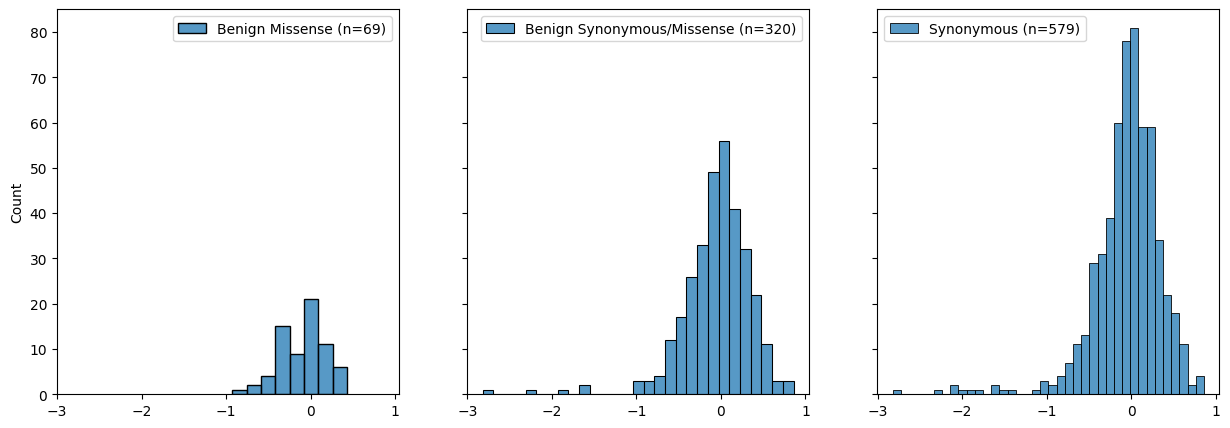

In [25]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)
# bins = np.linspace(scoreset_processed.score.min(),scoreset_processed.score.max(),25)
m1 = (scoreset_processed.apply(is_benign,axis=1)) & (~scoreset_processed.nonsense) &(~scoreset_processed.synonymous)
sns.histplot(scoreset_processed[m1].score.values,ax=ax[0],label=f"Benign Missense (n={m1.sum()})",stat='count')
m2 = (scoreset_processed.apply(is_benign,axis=1))& (~scoreset_processed.nonsense)
sns.histplot(scoreset_processed[m2].score.values,ax=ax[1],label=f"Benign Synonymous/Missense (n={m2.sum()})",stat='count')
m3= scoreset_processed.synonymous
sns.histplot(scoreset_processed[m3].score.values,ax=ax[2],label=f"Synonymous (n={m3.sum()})",stat='count')
[axi.legend() for axi in ax]

In [23]:
np.round(bins,3)

array([-4.592, -4.346, -4.1  , -3.854, -3.609, -3.363, -3.117, -2.871,
       -2.626, -2.38 , -2.134, -1.888, -1.642, -1.397, -1.151, -0.905,
       -0.659, -0.414, -0.168,  0.078,  0.324,  0.57 ,  0.815,  1.061,
        1.307])

In [31]:
INVERT_SCORES = False

sample_data = {
    "P/LP" : scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_pathogenic(r),axis=1)],
    "B/LB" : scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_benign(r),axis=1)],
    'gnomAD': scoreset_processed[scoreset_processed.apply(lambda r: not r.nonsense and is_gnomAD(r),axis=1)],
    'synonymous' : scoreset_processed[scoreset_processed.apply(is_synonymous,axis=1)],
}
sample_data = {k : v for k,v in sample_data.items() if len(v)}

if INVERT_SCORES:
    for k in sample_data:
        sample_data[k] = sample_data[k].assign(score= -sample_data[k].score)


In [32]:
for sample_name, sample in sample_data.items():
    print(f"{sample_name}: {sample.shape[0]}")

P/LP: 156
B/LB: 320
gnomAD: 329
synonymous: 568


(<Figure size 1200x1200 with 4 Axes>,
 array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object))

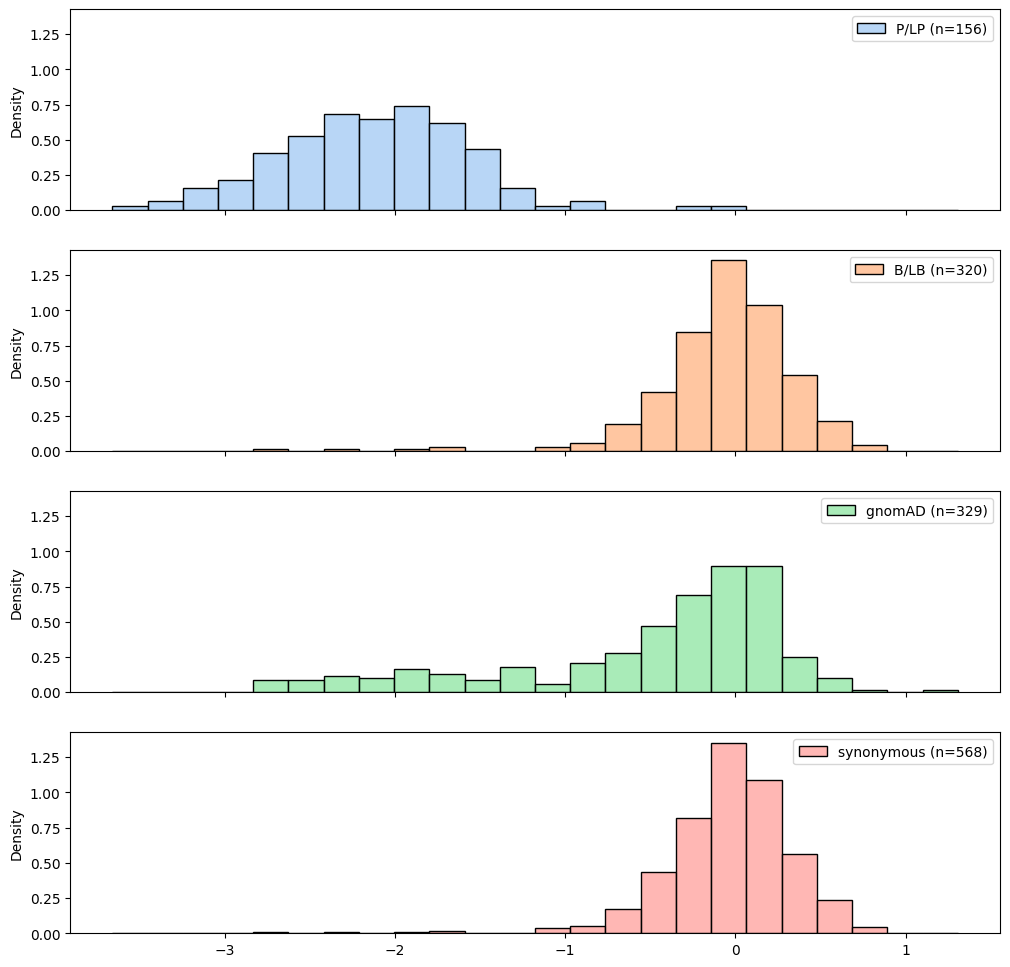

In [33]:
plotting.plot_samples({k : v.score.values for k,v in sample_data.items()})

In [34]:
pd.DataFrame.from_records([*[dict(sample_name='P/LP',score=score) for score in sample_data['P/LP'].score.values],
                            *[dict(sample_name='B/LB',score=score) for score in sample_data['B/LB'].score.values],
                            *[dict(sample_name='gnomAD',score=score) for score in sample_data['gnomAD'].score.values],
                            *[dict(sample_name='synonymous',score=score) for score in sample_data['synonymous'].score.values]]).to_csv(dataset_path / "samples.csv",index=False)